## Final Project Submission

Please fill out:
* Student name: James Benedito
* Student pace: Part Time
* Instructor name: Morgan Jones

## Introduction

Driving through a suburban neighborhood, it's inevitable that one will encounter at least one "for sale" sign. These signs typically have the logo of some big-time real estate company, like Century 21 or REMAX. Real estate companies are businesses that deal with buying and selling properties. When purchasing a house, everyone has their non-negotiables. Some people want a big kitchen or backyard. Others may want a basement or 'x' amount of bathrooms. In this Jupyter notebook, I will explore the different variables that impact a home's value. The information in this analysis will be applicable to real estate companies who sell houses to clients.

## Business Problem

King County is a county located in Washington state with a population of approximately 2.2 million people, according to the 2022 US Census. As of 2021, the median household income is about $106,000 (https://www.census.gov/quickfacts/kingcountywashington).

A theoretical real estate company in King County sells homes. They want to be informed and know the factors that increase a house's value. My data analysis will bring light to the variables that are most impactful to a home's sale price in King County and will thus inform this real estate company on the types of properties they should focus on selling.  

## Goal

My goal is to come up with three concrete suggestions based on a linear regression analysis. The final linear regression model will include the three variables that are most impactful to a house's sale price, which will serve as the dependent variable of interest throughout the entire exploration process. In other words, the independent variables in my final model will be those that are the best predictors of a house's sale price (the dependent variable). 

## Dataset

The dataset I am using for the analysis is <b>kc_house_data.csv</b>. This dataset includes data on houses in King County, which is where the theoretical real estate company and their clients are located.

## Dataset Exploration

I will begin by exploring the dataset, using the <b>.head()</b> method to visualize the first five rows in a table format. Furthermore, I will use the <b>.info()</b> and <b>.describe()</b> methods to get a better understanding of the overall dataset.

In [1]:
# importing relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
# initial exploration of dataset
house_data = pd.read_csv('data\\kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

From the .info() method, we see that there are 25 columns in the dataset. The <b>heat_source</b> and <b>sewer_system</b> columns have missing values. In terms of dtype, the dataset contains a mix of integers, float values, and objects (strings).

In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The <b>.describe()</b> method shows statistics for 15 columns, which are of dtype integer or float. The columns containing object dtypes are not included in the table generated above.

Next, I will perform a correlation between sale price and the integer and float variables to see which variables may have a linear relationship with price. I will use the <b>.corr()</b> method to do this.

In [5]:
# performing correlation between price and potential independent variables (int and float dtypes)
house_data.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

Based on the results from <b>.corr()</b>, it appears that <b>sqft_living</b> has the strongest correlation with <b>price</b> (r=0.61). This <b>sqft_living</b> variable may be useful for a baseline model.

## Baseline Model

As mentioned previously, <b>sqft_living</b> will be utilized for my simple linear regression baseline model. I will start by plotting the relationship between <b>sqft_living</b> and <b>price</b>. Then, I will generate the baseline model.

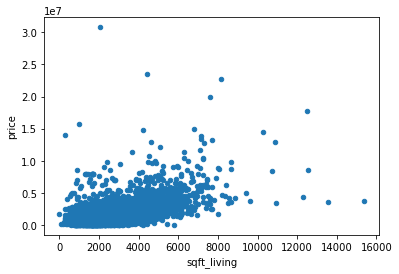

In [7]:
# scatterplot to visualize relationship between sqft_living and price
house_data.plot.scatter(x='sqft_living', y='price');

In [8]:
# generating baseline model
y = house_data["price"]
X_baseline = house_data[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        10:58:39   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

From the baseline model we see that the model is statistically significant overall (the p-value for the F-statistic is 0). According to the model, one unit increase in sqft_living will lead to about a $560 increase in price. The p-values for both the constant and the sqft_living coefficient are significant (both t-test p-values are 0). Based on the R-squared value, we know that the model explains only about 37% of the variance in price. Therefore, this isn't a strong model and needs to be improved further. Let's add some categorical variables to the mix and see if it improves the linear regression model.

## Categorical Variables

For the columns containing categorical information, the data needs to be transformed first before a model can be generated. Let's create a copy of the data table with only variables of object dtype present.

In [9]:
# creating copy of data with only obj columns
categorical_data = house_data.select_dtypes(include='object')
# use .head() to visualize first five rows and confirm that only categorical variables are present
categorical_data.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [10]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          30155 non-null  object
 1   waterfront    30155 non-null  object
 2   greenbelt     30155 non-null  object
 3   nuisance      30155 non-null  object
 4   view          30155 non-null  object
 5   condition     30155 non-null  object
 6   grade         30155 non-null  object
 7   heat_source   30123 non-null  object
 8   sewer_system  30141 non-null  object
 9   address       30155 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


Using the <b>.info()</b> method, we can confirm that the copied dataframe contains only the columns of object dtype. As mentioned earlier, the <b>heat_source</b> and <b>sewer_system</b> columns have missing entries. Therefore, it's probably best not to include those two columns. In addition, it would not make sense to look at <b>date</b> and <b>address</b> and their relationship with price, since both of these data vary too much and will most likely not have any discernable pattern. Let's create a new copy of the categorical dataframe that excludes these four columns (heat_source, sewer_system, date, address). I will also add the <b>price</b> column because it's the dependent variable of interest. Furthermore, I will include the <b>bedrooms</b>, <b>bathrooms</b>, and <b>floors</b> columns because even though they have int and float dtypes, they seemed to more discrete, categorical variables based on the earlier analysis.

In [12]:
# create another copy of categorical dataframe, excluding unnecessary columns
cat_data_edited = house_data[['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'bedrooms',
                              'bathrooms', 'floors', 'price']]
# use .head() to visualize first five rows
cat_data_edited.head()

,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price
0,NO,NO,NO,NONE,Good,7 Average,4,1.0,1.0,675000.0
1,NO,NO,YES,AVERAGE,Average,7 Average,5,2.5,1.0,920000.0
2,NO,NO,NO,AVERAGE,Average,7 Average,6,2.0,1.0,311000.0
3,NO,NO,NO,AVERAGE,Average,9 Better,3,3.0,2.0,775000.0
4,NO,NO,YES,NONE,Average,7 Average,2,2.0,2.0,592500.0


With the columns that in the <b>cat_data_edited</b> dataframe, some edits must be done to make the data more usable. Let's start by creating a new column called rating that extracts the number from grade. 

In [13]:
# creating a new column with just the number from grade
cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])
cat_data_edited

<ipython-input-13-00cf2c3f359d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['grade'].str.split().apply(lambda x: x[0])


,waterfront,greenbelt,nuisance,view,condition,grade,bedrooms,bathrooms,floors,price,rating
0,NO,NO,NO,NONE,Good,7 Average,4,1.0,1.0,675000.0,7
1,NO,NO,YES,AVERAGE,Average,7 Average,5,2.5,1.0,920000.0,7
2,NO,NO,NO,AVERAGE,Average,7 Average,6,2.0,1.0,311000.0,7
3,NO,NO,NO,AVERAGE,Average,9 Better,3,3.0,2.0,775000.0,9
4,NO,NO,YES,NONE,Average,7 Average,2,2.0,2.0,592500.0,7
...,...,...,...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,8 Good,5,2.0,1.5,1555000.0,8
30151,NO,NO,NO,FAIR,Average,7 Average,3,2.0,2.0,1313000.0,7
30152,NO,NO,YES,NONE,Average,7 Average,3,2.0,1.0,800000.0,7
30153,NO,NO,NO,NONE,Average,8 Good,3,2.5,2.0,775000.0,8


In [14]:
cat_data_edited['rating'].value_counts()

7     11697
8      9410
9      3806
6      2858
10     1371
11      406
5       393
12      122
4        51
13       24
3        13
2         2
1         2
Name: rating, dtype: int64

In [15]:
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  30155 non-null  object 
 1   greenbelt   30155 non-null  object 
 2   nuisance    30155 non-null  object 
 3   view        30155 non-null  object 
 4   condition   30155 non-null  object 
 5   grade       30155 non-null  object 
 6   bedrooms    30155 non-null  int64  
 7   bathrooms   30155 non-null  float64
 8   floors      30155 non-null  float64
 9   price       30155 non-null  float64
 10  rating      30155 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.5+ MB


Let's convert rating from an object dtype to an integer so its relationship with price can be graphed.

In [16]:
# convert rating to int dtype
cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')

<ipython-input-16-aef727951dc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['rating'] = cat_data_edited['rating'].astype('int64')


In [17]:
# checking if dtype of rating was converted successfully
cat_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  30155 non-null  object 
 1   greenbelt   30155 non-null  object 
 2   nuisance    30155 non-null  object 
 3   view        30155 non-null  object 
 4   condition   30155 non-null  object 
 5   grade       30155 non-null  object 
 6   bedrooms    30155 non-null  int64  
 7   bathrooms   30155 non-null  float64
 8   floors      30155 non-null  float64
 9   price       30155 non-null  float64
 10  rating      30155 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 2.5+ MB


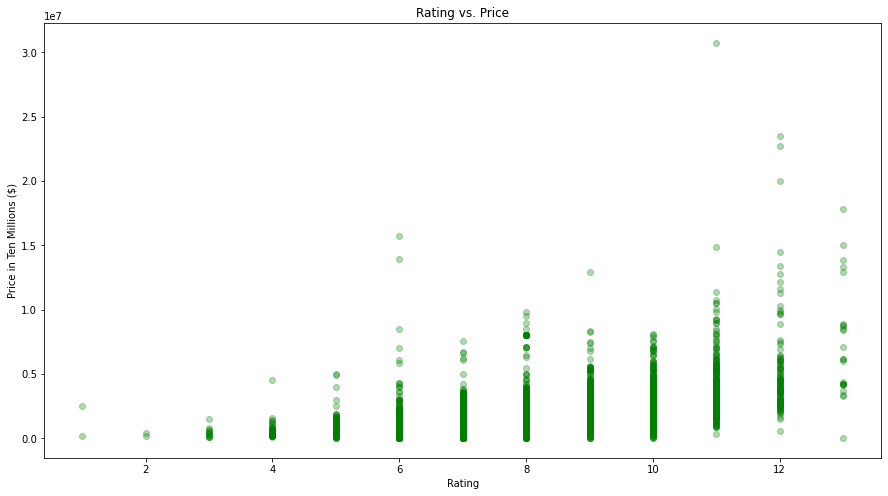

In [22]:
# creating scatterplot to visualize relationship between rating and price
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(cat_data_edited['rating'], cat_data_edited['price'], alpha=0.3, color="green")
ax.set_title("Rating vs. Price")
ax.set_xlabel("Rating")
ax.set_ylabel("Price in Ten Millions ($)");

In [21]:
# checking correlation between rating and price
cat_data_edited.corr()['price']

bedrooms     0.289204
bathrooms    0.480401
floors       0.180576
price        1.000000
rating       0.565263
Name: price, dtype: float64

Using <b>.corr()</b>, we see that the correlation coefficient between <b>rating</b> and <b>price</b> is about 0.57. Let's create a linear regression model with <b>rating</b> as the only independent variable.

In [23]:
y = cat_data_edited["price"]
X_rating = cat_data_edited[["rating"]]

rating_model = sm.OLS(y, sm.add_constant(X_rating))
rating_results = rating_model.fit()

print(rating_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.416e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        11:18:15   Log-Likelihood:            -4.5029e+05
No. Observations:               30155   AIC:                         9.006e+05
Df Residuals:                   30153   BIC:                         9.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.266e+06   2.87e+04    -79.012      0.0

The linear regression model with <b>rating</b> as the only independent variable is significant, with an F-statistic p-value of 0. Both the constant and the rating coefficient are significant and have a t-test p-value of 0. The coefficient for rating indicates that with one unit increase in rating, a $441,000 increase in price is expected. The model is weak, having an R-squared value of about 0.32. This model is actually worse at predicting the variance in price than the baseline model created earlier because it only accounts for about 32% of the variation, whereas the baseline detected about 37% of the variation in price.

Let's take a look at some of the other categorical variables.

In [25]:
cat_data_edited['waterfront'].value_counts()

NO     29636
YES      519
Name: waterfront, dtype: int64

In [26]:
cat_data_edited['greenbelt'].value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64

In [27]:
cat_data_edited['nuisance'].value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

In [28]:
cat_data_edited['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [29]:
cat_data_edited['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [30]:
cat_data_edited['bedrooms'].value_counts()

3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [31]:
cat_data_edited['bathrooms'].value_counts()

2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
0.0       31
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

In [32]:
cat_data_edited['floors'].value_counts()

1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

Looking at the <b>.value_counts()</b> for the other categorical variables, it appears that <b>greenbelt</b>, <b>nuisance</b>, and <b>view</b> are binary, having two categories ('NO' and 'YES'). Meanwhile, <b>view</b> and <b>condition</b> have five categories. The number of <b>bedrooms</b> range from 0-13, the number of <b>bathrooms</b> range from 1.0-10.5, and the number of <b>floors</b> range from 1.0-4.0. 

Let's create some bar graphs to visualize average price in relation to each variable.

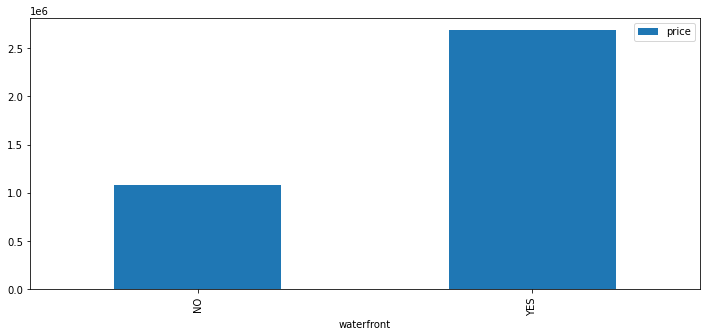

In [33]:
# waterfront vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("waterfront").mean().plot.bar(y="price", ax=ax);

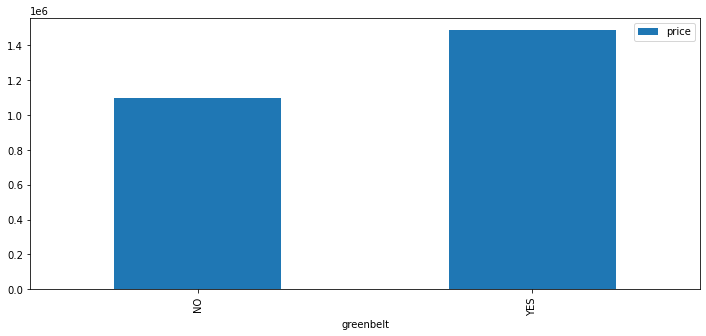

In [34]:
# greenbelt vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("greenbelt").mean().plot.bar(y="price", ax=ax);

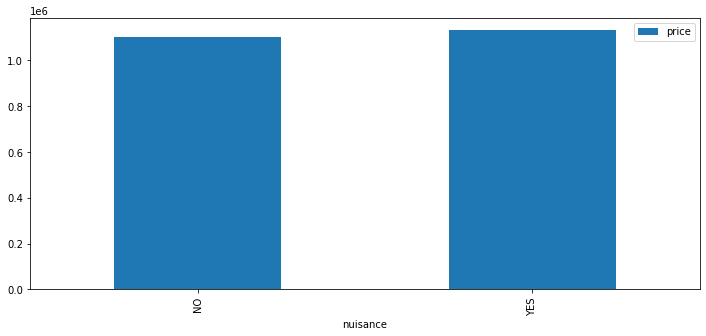

In [35]:
# nuisance vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("nuisance").mean().plot.bar(y="price", ax=ax);

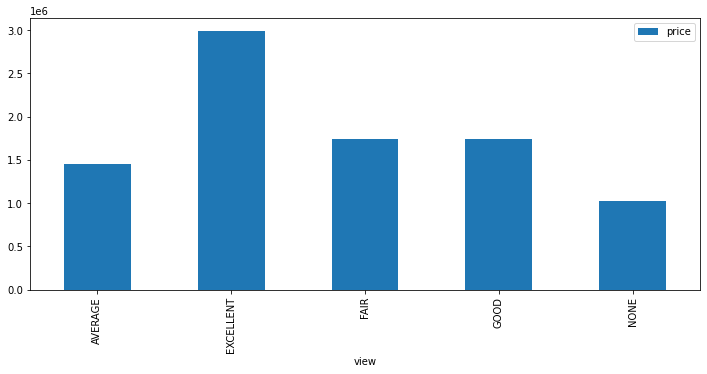

In [36]:
# view vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("view").mean().plot.bar(y="price", ax=ax);

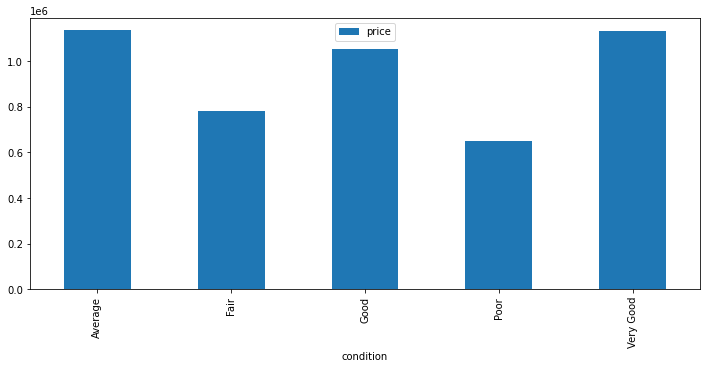

In [37]:
# condition vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("condition").mean().plot.bar(y="price", ax=ax);

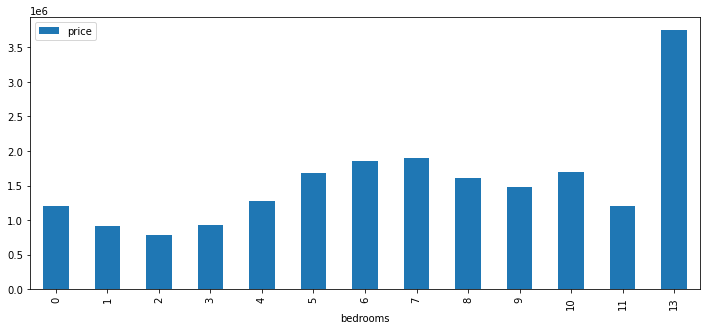

In [38]:
# bedrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bedrooms").mean().plot.bar(y="price", ax=ax);

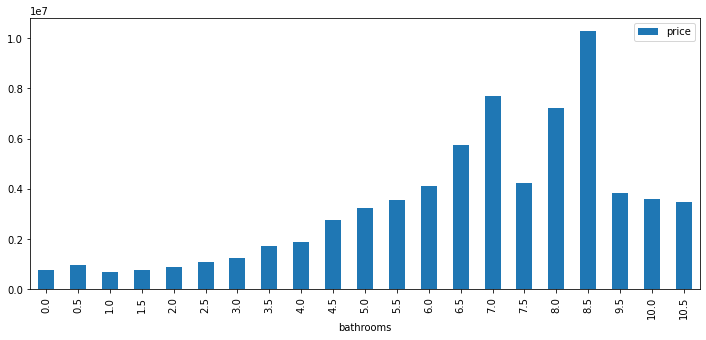

In [39]:
# bathrooms vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("bathrooms").mean().plot.bar(y="price", ax=ax);

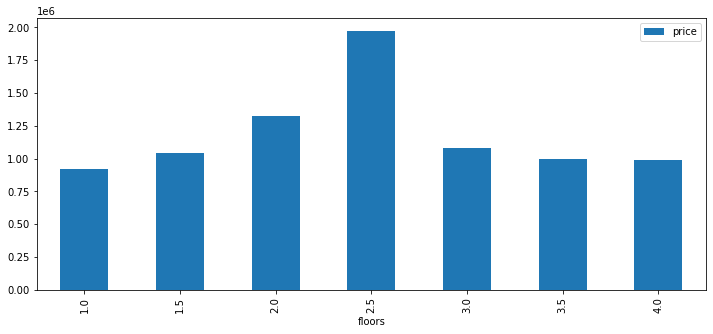

In [40]:
# floors vs price
fig, ax = plt.subplots(figsize=(12,5))
cat_data_edited.groupby("floors").mean().plot.bar(y="price", ax=ax);

Looking at the three binary variables (<b>waterfront</b>, <b>greenbelt</b>, and <b>nuisance</b>), it appears that having a waterfront versus not having one makes a difference in mean price, having a greenbelt versus not having one makes a slight difference in mean price, and nuisance does not make much of a difference in mean price. Specifically, the presence of a waterfront and greenbelt generally increases the price of a home, simply based on the bar graph visualizations of the raw data. 

For <b>view</b>, houses rated 'excellent' had a higher mean price than those rated 'none'. For <b>condition</b>, houses with 'average', 'very good', and 'good' ratings had a greater mean price than those rated 'poor'. 

For the <b>bedrooms</b> bar graph, we see a relatively normal distribution; however, there is an outlier of 13 bedrooms that has a really high mean price. The <b>bathrooms</b> bar graph shows a negative skew, while the bar graph for <b>floors</b> is mostly normal.

Let's create a linear regression model incorporating data from more of these categorical variables plus rating. However, before the model can be made, the strings in the <b>waterfront</b>, <b>greenbelt</b>, <b>nuisance</b>, <b>view</b>, and <b>condition</b> columns need to be converted into stand-in integers. 

In [42]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(cat_data_edited['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
cat_data_edited['waterfront'] = le.transform(cat_data_edited['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(cat_data_edited['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
cat_data_edited['greenbelt'] = le.transform(cat_data_edited['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(cat_data_edited['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['nuisance'] = le.transform(cat_data_edited['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(cat_data_edited['view'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['view'] = le.transform(cat_data_edited['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(cat_data_edited['condition'].drop_duplicates()) 
# create new view variable with label encoded values
cat_data_edited['condition'] = le.transform(cat_data_edited['condition'])

<ipython-input-42-d871175222c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['waterfront'] = le.transform(cat_data_edited['waterfront'])
<ipython-input-42-d871175222c9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_edited['greenbelt'] = le.transform(cat_data_edited['greenbelt'])
<ipython-input-42-d871175222c9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

We can see that the data in the waterfront, greenbelt, nuisance, view, and condition columns were successfully transformed. 

In [44]:
cat_data_edited['waterfront'].value_counts()

0    29636
1      519
Name: waterfront, dtype: int64

In [45]:
cat_data_edited['greenbelt'].value_counts()

0    29382
1      773
Name: greenbelt, dtype: int64

In [46]:
cat_data_edited['nuisance'].value_counts()

0    24893
1     5262
Name: nuisance, dtype: int64

In [47]:
cat_data_edited['view'].value_counts()

4    26589
0     1915
3      878
1      553
2      220
Name: view, dtype: int64

In [48]:
cat_data_edited['condition'].value_counts()

0    18547
2     8054
4     3259
1      230
3       65
Name: condition, dtype: int64

Using the .value_counts() method, we can figure out what each stand-in number represents by matching it up with the .value_counts() performed earlier for each variable in the categorical_data_cut dataframe.

For waterfront, greenbelt, and nuisance, '0' and '1' indicate 'NO' and 'YES' respectively. 

For view, it's a little more complicated:
- '4': 'NONE'
- '0': 'AVERAGE'
- '3': 'GOOD'
- '1': 'EXCELLENT'
- '2': 'FAIR'

Now that everything has been converted to integer stand-ins, we can use the <b>pd.get_dummies</b> function to create dummy variables and perform one-hot encoding. To avoid the dummy variable trap (perfect multicolinearity), we will use <b>.drop()</b>. Then, we can create our linear regression model.

In [68]:
y = cat_data_edited['price']
X = cat_data_edited[["waterfront", "greenbelt", "nuisance", "view", "condition", "bedrooms", "bathrooms",
                     "floors", "rating"]]

# get dummy variables
X = pd.get_dummies(X, columns=["rating"])
X = X.drop("rating_13", axis=1)

# create linear regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1364.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        12:10:41   Log-Likelihood:            -4.4638e+05
No. Observations:               30155   AIC:                         8.928e+05
Df Residuals:                   30134   BIC:                         8.930e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.226e+06   1.38e+05     45.161      0.0

This linear regression model of all the categorical variables of interest shows an R-squared of 0.475. This is an improvement from the baseline model.

# Numeric and Categorical Variables

We looked at the linear regression models with just numeric and categorical variables, respectively. Let's see what happens when we put them together.

In [53]:
# Adapted from Morgan Jones' code 
# https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb

from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the waterfront variable, while dropping any duplicates
le.fit(house_data['waterfront'].drop_duplicates()) 
# create new waterfront variable with label encoded values
house_data['waterfront'] = le.transform(house_data['waterfront'])

# fit the label encoder to the greenbelt variable, while dropping any duplicates
le.fit(house_data['greenbelt'].drop_duplicates()) 
# create new greenbelt variable with label encoded values
house_data['greenbelt'] = le.transform(house_data['greenbelt'])

# fit the label encoder to the nuisance variable, while dropping any duplicates
le.fit(house_data['nuisance'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['nuisance'] = le.transform(house_data['nuisance'])

# fit the label encoder to the view variable, while dropping any duplicates
le.fit(house_data['view'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['view'] = le.transform(house_data['view'])

# fit the label encoder to the condition variable, while dropping any duplicates
le.fit(house_data['condition'].drop_duplicates()) 
# create new view variable with label encoded values
house_data['condition'] = le.transform(house_data['condition'])

In [54]:
house_data['rating'] = house_data['grade'].str.split().apply(lambda x: x[0])
house_data['rating'] = house_data['rating'].astype('int64')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,rating
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,7
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,7
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,7
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,9
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,7


In [55]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  int32  
 9   greenbelt      30155 non-null  int32  
 10  nuisance       30155 non-null  int32  
 11  view           30155 non-null  int32  
 12  condition      30155 non-null  int32  
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [69]:
y = house_data['price']
X = house_data[["sqft_living", "rating", "bedrooms", "bathrooms", "floors", "waterfront", "view", "condition",
               "greenbelt", "nuisance"]]
X = pd.get_dummies(X, columns=["rating"])
X = X.drop('rating_13', axis=1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1426.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        12:13:56   Log-Likelihood:            -4.4569e+05
No. Observations:               30155   AIC:                         8.914e+05
Df Residuals:                   30133   BIC:                         8.916e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.873e+06    1.4e+05     34.933      

This model incorporating the categorical variables of interest plus <b>sqft_living</b> has an R-squared of 0.498.

## Conclusions

Three concrete suggestions based on final model

## Limitations and Future Improvements

Include assumptions of linear regression